In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('image_1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_flat = img_rgb.reshape((-1, 3))

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(img_flat)

In [ ]:
labels_2D = labels.reshape((img_rgb.shape[0], img_rgb.shape[1]))

In [ ]:
boxed_img = img_rgb.copy()

In [ ]:
for cluster_id in range(k):
    mask = np.where(labels_2D == cluster_id, 255, 0).astype(np.uint8)


    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(boxed_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

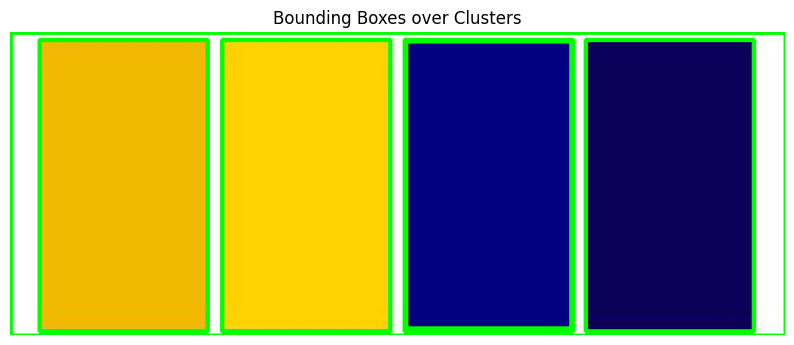

In [ ]:
plt.figure(figsize=(10, 7))
plt.imshow(boxed_img)
plt.title("Bounding Boxes over Clusters")
plt.axis("off")
plt.show()

unique color for each cluster is generated using gpt

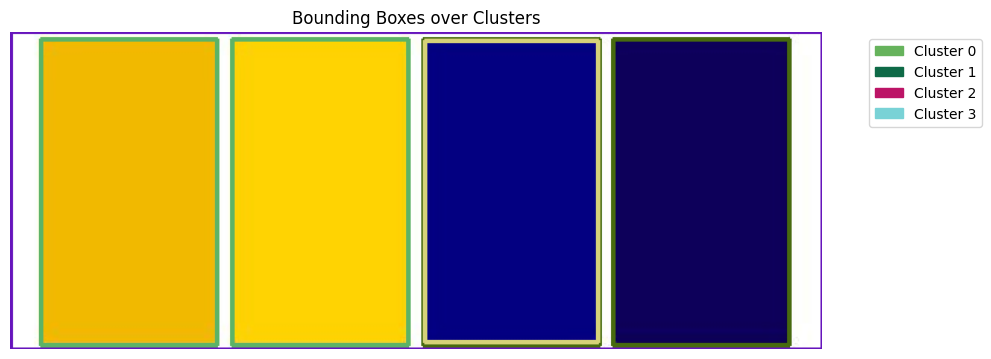

In [ ]:
import matplotlib.patches as mpatches

# Generate distinct colors for each cluster
np.random.seed(42)
cluster_colors = [tuple(np.random.randint(0, 256, 3).tolist()) for _ in range(k)]

boxed_img = img.copy()  # Start with a copy of original

for cluster_id in range(k):
    # Create binary mask
    mask = np.where(labels_2D == cluster_id, 255, 0).astype(np.uint8)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes with unique colors
    color = cluster_colors[cluster_id]
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(boxed_img, (x, y), (x + w, y + h), color, 2)

# Convert BGR to RGB
boxed_img_rgb = cv2.cvtColor(boxed_img, cv2.COLOR_BGR2RGB)

# Create legend
patches = [mpatches.Patch(color=np.array(c)/255.0, label=f'Cluster {i}') for i, c in enumerate(cluster_colors)]

# Display image with legend
plt.figure(figsize=(10, 7))
plt.imshow(boxed_img_rgb)
plt.title("Bounding Boxes over Clusters")
plt.axis("off")
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
